In [1]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.5 MB/s 


In [2]:
!pip install easyocr
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 9.0 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 8.2 MB 10.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFont, ImageDraw
import easyocr
from google.colab.patches import cv2_imshow
import re
import pymorphy2
from tqdm import tqdm

morph = pymorphy2.MorphAnalyzer()

In [4]:
def add2str(data, num):
    return [data[num][1],
            round(data[num][0][0][0]), #x
            round(data[num][0][0][1]), #y
            int(round(data[num][2], 2)*100)
            ]

In [5]:
def format(data):

    lines = list()
    new_str = list()

    new_str.append(add2str(data, 0))

    for idx, element in enumerate(data):
        if idx > 0 and data[idx-1][0][0][0] < data[idx][0][0][0]:
            new_str.append(add2str(data, idx))
        elif idx > 0 and data[idx-1][0][0][0] > data[idx][0][0][0]:
            lines.append(new_str)
            new_str = list()
            new_str.append(add2str(data, idx))

    return lines

In [6]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='black', width=2):
    draw = ImageDraw.Draw(image)
    
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

In [ ]:
#!pip install -U pip

In [7]:
easyocr.Reader(['ru'], ) 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'detect',
 'getChar',
 'readtext',
 'readtext_batched',
 'readtextlang',
 'recognize',
 'setLanguageList',
 'setModelLanguage']

In [ ]:
def easy_OCR(image, lang):
  
  #image's data
  reader = easyocr.Reader([lang]) 
  result = reader.readtext(image)#, width_ths=0.7, mag_ratio=3, canvas_size=4000)

  return result

In [ ]:
image = 'таблица_без_печати.jpg'
result_1 = easy_OCR(image, lang="ru")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

FileNotFoundError: ignored

In [ ]:
!git clone https://github.com/JaidedAI/EasyOCR.git

In [ ]:
result_1[10]

In [ ]:
def get_train_data(data):
  labels = pd.DataFrame()

  for idx in tqdm(range(len(data))):
    if data[idx][2] > 0.9:
      Image.open(image).crop((data[idx][0][0][0],
                              data[idx][0][0][1], 
                              data[idx][0][2][0], 
                              data[idx][0][2][1])).save('data/'+str(idx)+'.jpg')

      labels = labels.append({'filename': str(idx),
                              'words': data[idx][1]}, 
                             ignore_index=True)
      
  return labels

In [ ]:
labels = get_train_data(result_1)

NameError: ignored

In [ ]:
labels['filename'] = labels['filename'].apply(lambda x: x+'.jpg')

NameError: ignored

In [ ]:
len(labels)

NameError: ignored

In [ ]:
Image.open(image)

FileNotFoundError: ignored

SCORE

In [ ]:
morph.parse('финансовой'.lower())[0].score

0.688888

In [ ]:
morph.parse('бухгалтерских'.lower())[0].score

0.3333333333333333

In [ ]:
morph.parse('финаирввии'.lower())[0]

Parse(word='финаирввии', tag=OpencorporaTag('NOUN,inan,neut sing,loct'), normal_form='финаирввие', score=0.9846153846153846, methods_stack=((FakeDictionary(), 'финаирввии', 121, 5), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'вии')))

In [ ]:
morph.parse('атотоаав'.lower())[0]

Parse(word='атотоаав', tag=OpencorporaTag('GRND,impf,tran past'), normal_form='атотоаать', score=0.9663482414242293, methods_stack=((FakeDictionary(), 'атотоаав', 215, 95), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ав')))

In [ ]:
def is_significant(token, not_significant_tag: str="UNKN", not_significant_score: float=.7):

    token = morph.parse(token.lower())[0]

    return int((not_significant_tag not in token.tag) & (
        len(token.methods_stack)==1))
    

def elements_with_significant_tokens(document: list):

    """It solves the significant tokens score.
    The token is significant for NLP if it was recognized by
    the MorphAnalyzer with a rate more or equal to the not_significant_score value
    """

    res = list()
    incorrect_words = list()
    correct_words = list()
    text_str = []
    check_text = []
    text = []

    text_str.extend([elem[0] for tabs_elem in document for elem in tabs_elem if elem[0] != ''])
    check_text.extend([word for text in text_str for word in re.sub(r'\)', ' )', re.sub(r'\(', '( ', re.sub('[^а-яА-ЯЁёIV01234567890\-\=() ]', '', text))).split()])

    #for easyOSR
    for word in check_text:
      try:
        if word[1] == word[1].upper() and word[0] == 'к' and word[-1] == 'к':
            text.append(re.sub('к', '', word, 1)[:-1])
        elif word[1] == word[1].upper() and word[0] == 'к':
            text.append(re.sub('к', '', word, 1))
        else:
            text.append(word)
      except:
        text.append(word)

        continue 

    incorrect_words.extend([token for token in text if is_significant(token)==False])
    correct_words.extend([token for token in text if is_significant(token)])

    numbers = sum([is_significant(token) for token in text])

    print("Неверно прочитанные слова: ", incorrect_words)
    #print("Верно прочитанные слова: ", correct_words)
    print("Кол-во подтверженных лемм: ", numbers)
    print("Кол-во найденных лемм: ", len(check_text))

    return "Доля подтвержденных лемм: ", round(numbers/len(check_text), 2)

English picture with text


with image_transforming

In [ ]:
image = 'обычный_текст_без_фильтра.jpg'
result_1 = easy_OCR(image, lang="ru")

#image = Image.open(image)
#draw_boxes(image, result_1).save('result_обычный_текст_без_фильтра.jpg')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


FileNotFoundError: ignored

In [ ]:
#text's data
#format(result_1)

In [ ]:
#easyOCR
elements_with_significant_tokens(format(result_1))

In [ ]:
import re

Сheck tesseract

In [ ]:
def check_txt_file(file):

  corpus = []
  incorrect_words = []
  correct_words = []

  with open(file) as f:
    lines = f.readlines()

  corpus.extend(token for word in lines for token in re.sub(r'\)', ' )', re.sub(r'\(', '( ', re.sub('[^а-яА-ЯЁёIV01234567890\-\=() ]', '', word))).split())

  incorrect_words.extend([token for token in corpus if is_significant(token)==False])
  correct_words.extend([token for token in corpus if is_significant(token)])

  numbers = sum([is_significant(token) for token in corpus])

  print("Неверно прочитанные слова: ", incorrect_words)
  #print("Верно прочитанные слова: ", correct_words)
  print("Кол-во подтверженных лемм: ", numbers)
  print("Кол-во найденных лемм: ", len(corpus))
  print("Доля подтвержденных лемм: ", round(numbers/len(corpus), 2))

  return correct_words

TEXT

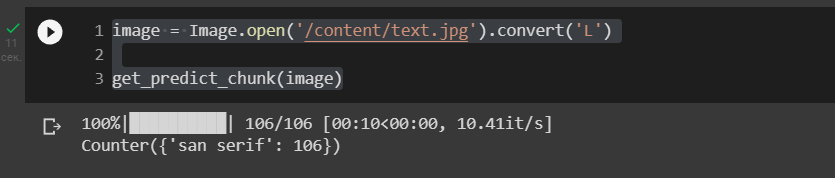

In [ ]:
#EasyOCR
image = 'text.jpg'
result_text = easy_OCR(image, lang="ru")

elements_with_significant_tokens(format(result_text))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Неверно прочитанные слова:  ['необнаружения']
Кол-во подтверженных лемм:  324
Кол-во найденных лемм:  325


('Доля подтвержденных лемм: ', 1.0)

In [ ]:
correct_words = check_txt_file('result_basic_text.txt')

Неверно прочитанные слова:  ['необнаружения', 'ПОлИТиИКи', 'основании-', 'дДолжЖнНы', 'взаимодеиствие', 'текущии', 'раеирытие', 'аеаовые', 'Зараае', 'аеа', 'оа']
Кол-во подтверженных лемм:  354
Кол-во найденных лемм:  365
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_serif = check_txt_file('result_serif_text.txt')

Неверно прочитанные слова:  ['необнаружения', 'инфермацию']
Кол-во подтверженных лемм:  364
Кол-во найденных лемм:  366
Доля подтвержденных лемм:  0.99


In [ ]:
correct_words_sans_serif = check_txt_file('result_sans_serif_text.txt')

Неверно прочитанные слова:  ['необнаружения', 'ое']
Кол-во подтверженных лемм:  367
Кол-во найденных лемм:  369
Доля подтвержденных лемм:  0.99


Contrast 4

In [ ]:
correct_words_4 = check_txt_file('result_basic_text_4.txt')

Неверно прочитанные слова:  ['необнаружения', 'ПОЛИТиИКиИ', 'основании-', 'долЖжнНы', 'взаимодеиствие', 'текущии', 'когАа', 'рабирытие', 'лосеные', 'аааае', 'Поеаеинесе', 'аееа', 'Зеше']
Кол-во подтверженных лемм:  353
Кол-во найденных лемм:  366
Доля подтвержденных лемм:  0.96


In [ ]:
correct_words_serif_4 = check_txt_file('result_serif_text_4.txt')

Неверно прочитанные слова:  ['необнаружения', 'инфермацию', 'ие', 'ылв', 'Сота', 'ый']
Кол-во подтверженных лемм:  362
Кол-во найденных лемм:  368
Доля подтвержденных лемм:  0.98


In [ ]:
correct_words_sans_serif_4 = check_txt_file('result_sans_serif_text_4.txt')

Неверно прочитанные слова:  ['необнаружения', 'ъ', 'оо', 'рава']
Кол-во подтверженных лемм:  364
Кол-во найденных лемм:  368
Доля подтвержденных лемм:  0.99


TABLE

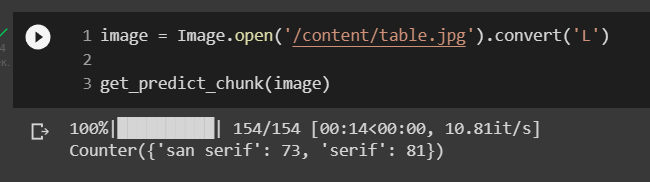

In [ ]:
#EasyOCR
image = 'table.jpg'
result_table = easy_OCR(image, lang="ru")

elements_with_significant_tokens(format(result_table))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Неверно прочитанные слова:  ['АЛРОСАх', 'ПАО', 'З1', '2О1б', '2О16', 'ОКУД', 'АК', 'ПАО', 'ОКпо', 'ОКВЭД', 'ОКоПФоКФС', 'рубнжн', 'ОКеИ', '2О16', '2О15']
Кол-во подтверженных лемм:  492
Кол-во найденных лемм:  507


('Доля подтвержденных лемм: ', 0.97)

In [ ]:
correct_words_table = check_txt_file('result_basic_table.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'яттт', 'ПоУЙ', 'ОКЕИ', 'дулла', 'МУУ', '=']
Кол-во подтверженных лемм:  508
Кол-во найденных лемм:  522
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_table_serif = check_txt_file('result_serif_table.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', '=']
Кол-во подтверженных лемм:  516
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.98


In [ ]:
correct_words_table_sans_serif = check_txt_file('result_sans_serif_table.txt')

Неверно прочитанные слова:  ['ПАО', 'З1', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', '=']
Кол-во подтверженных лемм:  515
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.98


Сontrast 6

In [ ]:
correct_words_table_6 = check_txt_file('result_basic_table_6.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'яттт', 'ОКЕИ', 'делла', 'мумь', 'пицам', 'дивиденлов']
Кол-во подтверженных лемм:  503
Кол-во найденных лемм:  517
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_table_6_serif = check_txt_file('result_serif_table_6.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ати', 'ео', 'ОКЕИ', 'лоллле', 'ру', 'ь']
Кол-во подтверженных лемм:  510
Кол-во найденных лемм:  524
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_table_6_sans_serif = check_txt_file('result_sans_serif_table_6.txt')

Неверно прочитанные слова:  ['ПАО', 'З1', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ео', 'ОКЕИ', 'лоллле', 'ру', 'Мь']
Кол-во подтверженных лемм:  512
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.97


Contrast 4

In [ ]:
correct_words_table_4 = check_txt_file('result_basic_table_4.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', 'Гхятит', '9б', 'дедла', 'МуМ']
Кол-во подтверженных лемм:  505
Кол-во найденных лемм:  518
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_table_4_serif = check_txt_file('result_serif_table_4.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'Лмпи', 'Уб', 'лоллле', 'уу', 'Мь']
Кол-во подтверженных лемм:  513
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.98


In [ ]:
correct_words_table_4_sans_serif = check_txt_file('result_sans_serif_table_4.txt')

Неверно прочитанные слова:  ['ПАО', 'З1', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', 'мпи', 'пуб', 'лоллле', 'уу', 'Мь']
Кол-во подтверженных лемм:  511
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.97


Contrast 1

In [ ]:
correct_words_table_1 = check_txt_file('result_basic_table_1.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'яттт', 'ПоУЙ', 'ОКЕИ', 'дилла', 'МУУ', '=']
Кол-во подтверженных лемм:  508
Кол-во найденных лемм:  522
Доля подтвержденных лемм:  0.97


In [ ]:
correct_words_table_1_serif = check_txt_file('result_serif_table_1.txt')

Неверно прочитанные слова:  ['ПАО', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', '=']
Кол-во подтверженных лемм:  516
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.98


In [ ]:
correct_words_table_1_sans_serif = check_txt_file('result_sans_serif_table_1.txt')

Неверно прочитанные слова:  ['ПАО', 'З1', 'ОКУД', 'АК', 'ПАО', 'ОКПО', 'ОКВЭД', 'формаформа', 'ОКОПФОКФС', 'ОКЕИ', '=']
Кол-во подтверженных лемм:  515
Кол-во найденных лемм:  526
Доля подтвержденных лемм:  0.98


In [ ]:
#какие слова были найдены
#set(correct_words).difference(set(correct_words_arial))

Noise// Contrast 2

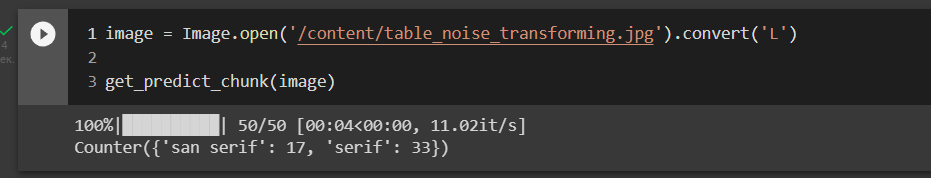

In [ ]:
correct_words_table_noise = check_txt_file('result_table_noise_basic.txt')

Неверно прочитанные слова:  ['БУХГАЛТЕРСКИЗ', 'шиви', 'ОКУД', 'Дата(', 'чиело', 'месиц', 'зь', 'Органкзшия', 'акинонерное', 'Лальмевосточная', 'зепгетичесыая', 'комплнит', 'поокпо', 'иа', 'зуззоватто', 'Ицентификационный', 'налотоплател', 'даятельности', 'Рагпнечежение', 'очектоонети', 'оквод', 'З00з', 'формшл', 'рма', 'собственностн', 'ня', 'Публичице', 'пкинои', 'пе', 'обишествой', 'Смешаныая', 'дозей', 'собственност', 'поокопФокос', 'ео', 'Единниа', 'алрсс', 'Влаливосток', 'хд', 'Тнгоовая', 'Понсие', 'докабря', 'НаЗ1', 'лекабра', 'Намменование', 'з1', 'свелства', 'втх', 'незавевшениое', 'стооштеьсино', 'Похозные', 'вложених', 'матеональные', 'шенности', 'Финансоные', 'кложеныя', 'ито', 'Отложевные', 'Почно', 'вигобосотные', 'антивы', '1Итого', 'оазаелу', 'ио', 'чозом', 'Заласы', 'пю', 'з0072', 'добавлениую', 'стонмость', 'приобретьнным', 'пиеиностям', '2в', 'Лебитовская', 'залолженность', 'Пратежи', 'пвсль', 'стчетной', 'Пратежи', 'хоторой', 'ожилаются', 'атм', 'поконатели', 'нсключ

In [ ]:
correct_words_table_noise_serif = check_txt_file('result_table_noise_serif.txt')

Неверно прочитанные слова:  ['мизия', 'ОКУД', 'ото001', 'зо', 'ЕТ', 'Органняашия', 'Лальменостечная', 'знепгетичесиая', 'компаниех', 'ОКПО', 'эн1286', 'этзовето', 'Ицентификационный', 'налотоплател', 'Внх', 'дентельности', 'Распьелелнние', 'Уектооэнеси', 'ОКВЭД', 'рма', 'акинон', 'обищество', 'лваей', 'собственност', 'окопФОКОС', 'зы', 'Еаниниа', 'аарее', 'Тисповая', 'Понсие', 'ВИЕОБОРОТНЫЕ', 'Осногные', 'свелства', 'з2', 'незавевшенное', 'стооительство', 'Псхозные', 'матеональные', 'иенности', 'ч129', 'ч1213', 'актняы', 'Поочне', 'внгобоотные', 'ваззелт', 'ч8', 'з274', 'зл', 'зо072', 'Лебитовская', 'залолженность', 'Пратежн', 'стчетной', 'пп27о4', 'Пратежи', 'втеченне', 'посяе', 'в2я', 'покспатели', '1а', 'спелегыа', 'эковалениы', 'Пеечие', 'обосотные', '5740г', 'Устаный', 'канитал', 'з0', 'вклазля', 'товаснишей', 'Лобавсчный', 'пеоесиенки', 'з12', 'Резеовный', 'кмитал', 'Неваспоеделенная', 'понбыль', 'ви', 'тя2от', 'оззаелу', 'ПЕ', '1У', 'БЯЗАТИ', 'ЬСТВА', 'Отложа', 'з313', 'тч', 'по

In [ ]:
correct_words_table_noise_sans_serif = check_txt_file('result_table_noise_sans_serif.txt')

Неверно прочитанные слова:  ['З0', 'мизия', 'ОКУД', 'отосо1', 'зо', 'ЕТ', 'Органншия', 'акинонерное', 'Лальмевосточная', 'знепгетичесмая', 'компаниех', 'ОКПО', 'эн1286', 'этззовето', 'Ицентификационный', 'налогоплател', 'дентельности', 'Распьелезение', 'Уектооэнеои', 'ОКВОД', 'до103', 'рма', 'собетвенность', 'пкинон', 'Смешаниая', 'яваей', 'собственност', 'окопФОКОС', 'зы', 'Еаинниа', 'варее', 'Тигповая', 'Понсие', 'ВИЕОБОРОТНЫЕ', 'свелства', 'з2', 'незавевшенное', 'стооительство', 'ня', 'вз', 'Псхозные', 'матеональные', 'шенности', 'з1э13', 'ча', 'Поочне', 'вигобоотные', 'ваззелт', 'ч2', 'ов', 'зл', 'зо07', 'Лебитовская', 'залолженность', 'Пратежи', 'лноеле', 'стчетной', '27а', 'Пратежи', 'втеченне', 'в2я', 'покопатели', 'Закотчики', 'п22201', 'спелегыа', 'экоивалениы', 'Пвочие', 'обосотные', 'В047', 'зо', '5отмвогю', 'кавитал', 'з0', 'вкзааыя', 'товаснишев', 'мов', 'Побавснный', 'пеоесиенки', 'зл2', 'кмитал', 'Неваспоеделенная', 'понбыль', 'ви', 'тядот', 'озззелу', 'ПЕ', 'БЯЗАТИ', 'С